## Definindo algumas funções


#### 1. Função para calcular o faturamento das lojas

In [1]:
# Função para calcular o faturamento das lojas e adiciona-las ao DataFrame dados
def calcular_faturamento(loja, x):
  faturamento = loja['Preço'].sum()
  dados_faturamento.loc[x-1] = [f'Loja {x}', faturamento]
  print(f'Faturamento Loja {x}: R$ {faturamento:,.2f}')
  return faturamento

#### 2. Função para ler e gerar um dataframe acerca das vendas por categoria

In [2]:
def vendas_categoria(loja):
  qtd_categoria = loja['Categoria do Produto'].value_counts().reset_index()
  qtd_categoria.columns = ['Categoria', 'Quantidade']
  qtd_categoria['Porcentagem'] = round(qtd_categoria['Quantidade'] / qtd_categoria['Quantidade'].sum() * 100, 2)

  return qtd_categoria

#### 3. Função para calcular a média de avaliação das lojas

In [3]:
def media_avaliacao(loja, x):
  avaliacao = loja['Avaliação da compra'].mean()
  avaliacao_media.loc[x-1] = [f'Loja {x}', round(avaliacao, 2)]

  return avaliacao

#### 4. Função para calcular o frete médio, os fretes solicitados e os não solicitados das lojas


In [4]:
def media_frete(loja, x):
  frete = round(loja['Frete'].mean(), 2)
  frete_medio.loc[x-1, ['Loja', 'Frete Médio']] = [f'Loja {x}', frete]

  return (frete, frete_medio)

#### Função para calcular os produtos mais vendidos e os menos vendidos

In [5]:
def prod_mais_vendidos(loja):
  mais_vendidos = loja['Produto'].value_counts().reset_index()
  mais_vendidos.columns = ['Produto', 'Quantidade']

  return mais_vendidos.head(5)

In [6]:
def prod_menos_vendidos(loja):
  menos_vendidos = loja['Produto'].value_counts().sort_values(ascending= True).reset_index()
  menos_vendidos.columns = ['Produto', 'Quantidade']

  return menos_vendidos.head(5)

### Importação dos dados

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
url_1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url_2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url_3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url_4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

## Realizando a leitura dos dados das lojas

In [31]:
loja_1 = pd.read_csv(url_1)
loja_2 = pd.read_csv(url_2)
loja_3 = pd.read_csv(url_3)
loja_4 = pd.read_csv(url_4)

## 1. Análise do faturamento

### Tratando alguns dados

#### Colocando as primeiras letras das categorias dos produtos em maiúsculas

In [32]:
loja_1['Categoria do Produto'] = [s.capitalize() for s in loja_1['Categoria do Produto']]
loja_2['Categoria do Produto'] = [s.capitalize() for s in loja_2['Categoria do Produto']]
loja_3['Categoria do Produto'] = [s.capitalize() for s in loja_3['Categoria do Produto']]
loja_4['Categoria do Produto'] = [s.capitalize() for s in loja_4['Categoria do Produto']]

#### Transformando a coluna 'Data da Compra' que está em formato 'object' para 'datetime'

In [33]:
loja_1['Data da Compra'] = pd.to_datetime(loja_1['Data da Compra'], dayfirst=True)
loja_2['Data da Compra'] = pd.to_datetime(loja_2['Data da Compra'], dayfirst=True)
loja_3['Data da Compra'] = pd.to_datetime(loja_3['Data da Compra'], dayfirst=True)
loja_4['Data da Compra'] = pd.to_datetime(loja_4['Data da Compra'], dayfirst=True)

#### Criando o DataFrame para análise das lojas Alura Store

In [34]:
# Criação do DataFrame para análise do faturamento das lojas Alura Store
dados_faturamento = pd.DataFrame(columns=['Loja','Faturamento'])

In [35]:
calcular_faturamento(loja_1, 1)
calcular_faturamento(loja_2, 2)
calcular_faturamento(loja_3, 3)
calcular_faturamento(loja_4, 4)

Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


np.float64(1384497.58)

In [36]:
dados_faturamento['Porcentagem'] = round(dados_faturamento['Faturamento'] / dados_faturamento['Faturamento'].sum() * 100)
dados_faturamento

,Loja,Faturamento,Porcentagem
0,Loja 1,1534509.12,26.0
1,Loja 2,1488459.06,25.0
2,Loja 3,1464025.03,25.0
3,Loja 4,1384497.58,24.0


#### Gerando uma visualização do faturamento nas 4 unidades da Alura Store em um gráfico de barras

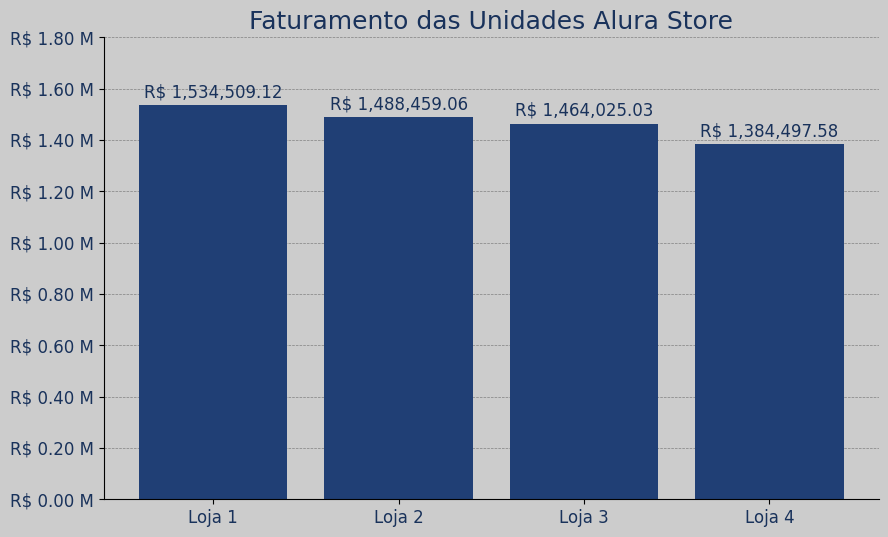

In [71]:
fig = plt.figure(figsize=(10, 6), facecolor='#cccccc')
ax = plt.axes()
ax.set_facecolor('#cccccc')
bars = plt.bar(dados_faturamento['Loja'], dados_faturamento['Faturamento'], color='#203f75')

for bar in bars:
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = bar.get_height() + (dados_faturamento['Faturamento'].max() * 0.01)
    value_text = f'R$ {bar.get_height()/1e0:,.2f}'
    plt.text(x_pos, y_pos, value_text, ha='center', va='bottom', color='#19325b', fontsize=12)

formatted_yticks = ['R$ {:.2f} M'.format(val/1e6) for val in ax.get_yticks()]
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels (formatted_yticks, fontsize=12, color='#19325b')

plt.title('Faturamento das Unidades Alura Store', color='#19325b', fontsize= 18)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize= 12, color='#19325b')
plt.yticks(fontsize= 12, color='#19325b')

ax.spines[['top', 'right']].set_visible(False)
ax.yaxis.grid(color='gray', linestyle='--', linewidth= 0.5)
ax.set_axisbelow(True)

plt.show()

## 2. Vendas por categoria


#### Gerando os DataFrames e gráficos de forma individual

In [39]:
cat_loja_1 = vendas_categoria(loja_1)
cat_loja_1

,Categoria,Quantidade,Porcentagem
0,Moveis,465,19.71
1,Eletronicos,448,18.99
2,Brinquedos,324,13.73
3,Eletrodomesticos,312,13.23
4,Esporte e lazer,284,12.04
5,Instrumentos musicais,182,7.72
6,Livros,173,7.33
7,Utilidades domesticas,171,7.25


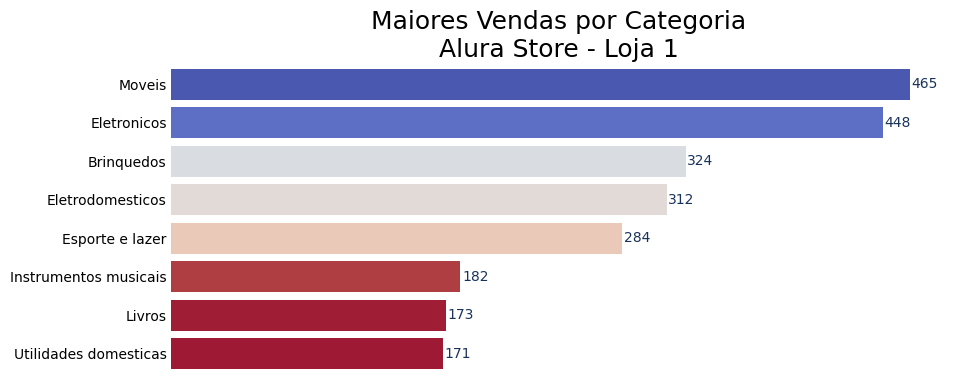

In [180]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(data=cat_loja_1, y=cat_loja_1['Categoria'], x='Quantidade', orient='h', hue='Quantidade', palette='coolwarm_r', legend=False)

for i, v in enumerate(cat_loja_1['Quantidade']):
      ax.text(v + 1, i, str(v), color='#19325b', fontsize=10, ha = 'left', va = 'center')

ax.set_title(f'Maiores Vendas por Categoria\nAlura Store - Loja 1', loc='center', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length= 0)
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.show()

In [41]:
cat_loja_2 = vendas_categoria(loja_2)

,Categoria,Quantidade,Porcentagem
0,Moveis,442,18.74
1,Eletronicos,422,17.89
2,Brinquedos,313,13.27
3,Eletrodomesticos,305,12.93
4,Esporte e lazer,275,11.66
5,Instrumentos musicais,224,9.50
6,Livros,197,8.35
7,Utilidades domesticas,181,7.67


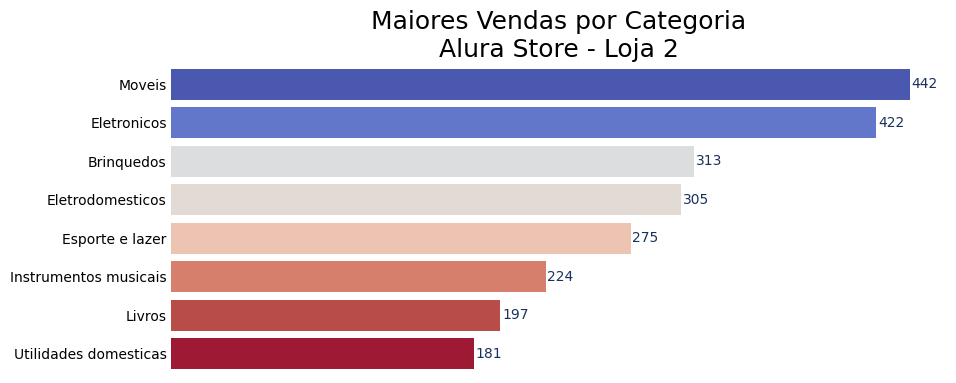

In [185]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(data=cat_loja_2, y=cat_loja_2['Categoria'], x='Quantidade', orient='h', hue='Quantidade', palette='coolwarm_r', legend=False)

for i, v in enumerate(cat_loja_2['Quantidade']):
      ax.text(v + 1, i, str(v), color='#19325b', fontsize=10, ha = 'left', va = 'center')

ax.set_title(f'Maiores Vendas por Categoria\nAlura Store - Loja 2', loc='center', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length= 0)
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.show()

In [43]:
cat_loja_3 = vendas_categoria(loja_3)

,Categoria,Quantidade,Porcentagem
0,Moveis,499,21.15
1,Eletronicos,451,19.12
2,Brinquedos,315,13.35
3,Eletrodomesticos,278,11.78
4,Esporte e lazer,277,11.74
5,Livros,185,7.84
6,Instrumentos musicais,177,7.50
7,Utilidades domesticas,177,7.50


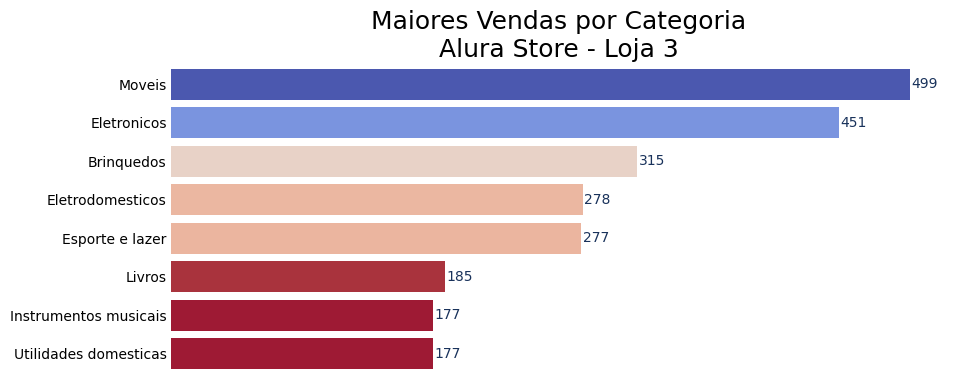

In [187]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(data=cat_loja_3, y=cat_loja_3['Categoria'], x='Quantidade', orient='h', hue='Quantidade', palette='coolwarm_r', legend=False)

for i, v in enumerate(cat_loja_3['Quantidade']):
      ax.text(v + 1, i, str(v), color='#19325b', fontsize=10, ha = 'left', va = 'center')

ax.set_title(f'Maiores Vendas por Categoria\nAlura Store - Loja 3', loc='center', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length= 0)
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.show()

In [45]:
cat_loja_4 = vendas_categoria(loja_4)

,Categoria,Quantidade,Porcentagem
0,Moveis,480,20.36
1,Eletronicos,451,19.13
2,Brinquedos,338,14.33
3,Esporte e lazer,277,11.75
4,Eletrodomesticos,254,10.77
5,Utilidades domesticas,201,8.52
6,Livros,187,7.93
7,Instrumentos musicais,170,7.21


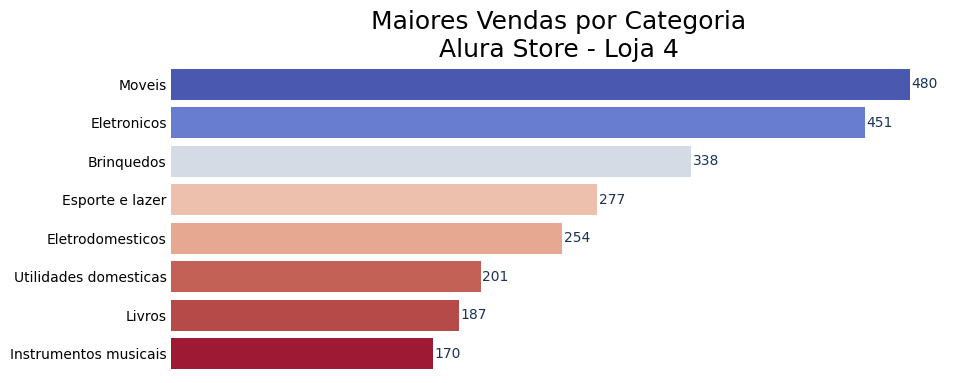

In [188]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(data=cat_loja_4, y=cat_loja_4['Categoria'], x='Quantidade', orient='h', hue='Quantidade', palette='coolwarm_r', legend=False)

for i, v in enumerate(cat_loja_4['Quantidade']):
      ax.text(v + 1, i, str(v), color='#19325b', fontsize=10, ha = 'left', va = 'center')

ax.set_title(f'Maiores Vendas por Categoria\nAlura Store - Loja 4', loc='center', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length= 0)
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.show()

#### Concatenando os dados das 4 lojas e gerando um gráfico

In [47]:
loja_1['Loja'] = 'Loja 1'
loja_2['Loja'] = 'Loja 2'
loja_3['Loja'] = 'Loja 3'
loja_4['Loja'] = 'Loja 4'

In [109]:
df_total = pd.concat([loja_1, loja_2, loja_3, loja_4], ignore_index=True)

In [49]:
vendas_categoria_final = pd.crosstab(index=df_total['Loja'], columns=df_total['Categoria do Produto'])

In [50]:
vendas_categoria_final

Categoria do Produto,Brinquedos,Eletrodomesticos,Eletronicos,Esporte e lazer,Instrumentos musicais,Livros,Moveis,Utilidades domesticas
Loja,,,,,,,,
Loja 1,324,312,448,284,182,173,465,171
Loja 2,313,305,422,275,224,197,442,181
Loja 3,315,278,451,277,177,185,499,177
Loja 4,338,254,451,277,170,187,480,201


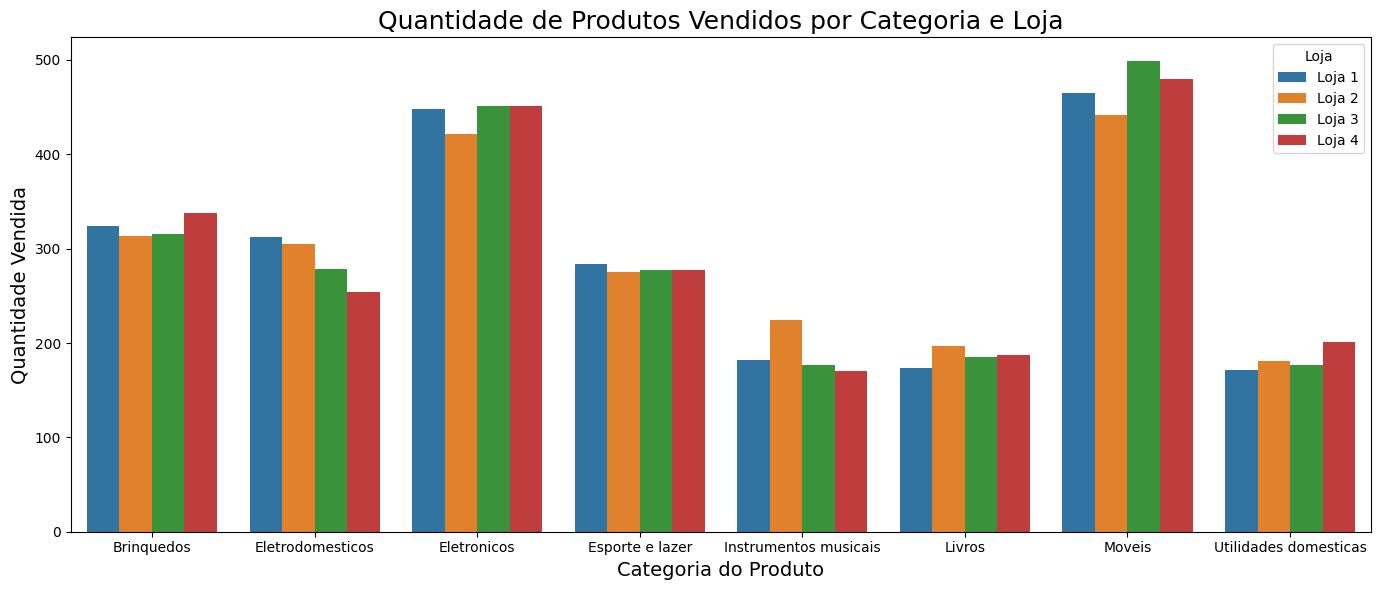

In [104]:
# Criação de um gráfico de barras agrupadas para exibir as vendas por categoria e loja
df_plot = vendas_categoria_final.reset_index()
df_plt_vendas = df_plot.melt(id_vars='Loja', var_name='Categoria do Produto', value_name='Quantidade')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_plt_vendas, x='Categoria do Produto', y='Quantidade', hue='Loja')
plt.title('Quantidade de Produtos Vendidos por Categoria e Loja', fontsize= 18)
plt.xlabel('Categoria do Produto', fontsize= 14)
plt.ylabel('Quantidade Vendida', fontsize= 14)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

## 3. Média de avaliação por loja

In [140]:
avaliacao_media = pd.DataFrame(columns=['Loja', 'Média'])
avaliacao_media

,Loja,Média


In [141]:
media_avaliacao(loja_1, 1)
media_avaliacao(loja_2, 2)
media_avaliacao(loja_3, 3)
media_avaliacao(loja_4, 4)

np.float64(3.9957591178965224)

In [142]:
avaliacao_media

,Loja,Média
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


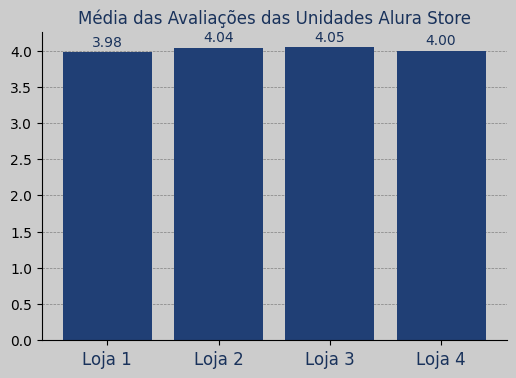

In [160]:
fig = plt.figure(figsize=(6, 4), facecolor='#cccccc')
ax = plt.axes()
ax.set_facecolor('#cccccc')
bars = plt.bar(avaliacao_media['Loja'], avaliacao_media['Média'], color='#203f75')

for bar in bars:
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = bar.get_height() + (avaliacao_media['Média'].max() * 0.01)
    value_text = f'{bar.get_height():,.2f}'
    plt.text(x_pos, y_pos, value_text, ha='center', va='bottom', color='#19325b', fontsize=10)

plt.title('Média das Avaliações das Unidades Alura Store', color='#19325b', fontsize= 12)
plt.xlabel('')
plt.xticks(fontsize= 12, color='#19325b')


ax.spines[['top', 'right']].set_visible(False)
ax.yaxis.grid(color='gray', linestyle='--', linewidth= 0.5)
ax.set_axisbelow(True)

plt.show()

## 4. Produtos

In [54]:
df_produtos = pd.crosstab(index=df_total['Loja'], columns=df_total['Produto'])

Produto,Assistente virtual,Bateria,Bicicleta,Blocos de montar,Bola de basquete,Bola de vôlei,Boneca bebê,Cadeira de escritório,Cama box,Cama king,...,Panela de pressão,Poltrona,Secadora de roupas,Smart TV,Smartwatch,Sofá retrátil,TV Led UHD 4K,Tablet ABXY,Violão,Xadrez de madeira
Loja,,,,,,,,,,,,,,,,,,,,,
Loja 1,40,53,54,56,55,42,40,46,44,44,...,35,41,58,44,43,46,60,42,46,49
Loja 2,38,61,45,54,42,46,48,49,47,45,...,44,35,57,40,44,44,45,44,58,45
Loja 3,39,41,52,35,50,48,39,46,46,56,...,47,47,45,54,46,45,42,48,47,47
Loja 4,50,48,45,54,50,48,48,40,62,56,...,46,45,40,54,39,47,40,45,37,39


### 4.1 - Mais vendidos

In [55]:
# Criando uma lista para armazenar os dados organizados
dados_ranking = []

for index, row in df_produtos.iterrows():
    # Pega os 5 maiores para a loja atual
    top5 = row.nlargest(5)

    # Cria um dicionário com os nomes e valores
    linha = {
        'Loja': index,
        '1º Produto': top5.index[0], '1º Qtd': top5.values[0],
        '2º Produto': top5.index[1], '2º Qtd': top5.values[1],
        '3º Produto': top5.index[2], '3º Qtd': top5.values[2],
        '4º Produto': top5.index[3], '4º Qtd': top5.values[3],
        '5º Produto': top5.index[4], '5º Qtd': top5.values[4]
    }
    dados_ranking.append(linha)

# Transforma em DataFrame
df_final = pd.DataFrame(dados_ranking).set_index('Loja')

df_final


,1º Produto,1º Qtd,2º Produto,2º Qtd,3º Produto,3º Qtd,4º Produto,4º Qtd,5º Produto,5º Qtd
Loja,,,,,,,,,,
Loja 1,Guarda roupas,60,Micro-ondas,60,TV Led UHD 4K,60,Secadora de roupas,58,Blocos de montar,56
Loja 2,Iniciando em programação,65,Micro-ondas,62,Bateria,61,Pandeiro,58,Violão,58
Loja 3,Kit banquetas,57,Cama king,56,Mesa de jantar,56,Cômoda,55,Jogo de panelas,55
Loja 4,Cama box,62,Faqueiro,59,Cama king,56,Dashboards com Power BI,56,Carrinho controle remoto,55


In [198]:
mais_vendidos_loja_1 = prod_mais_vendidos(loja_1)

,Produto,Quantidade
0,Micro-ondas,60
1,TV Led UHD 4K,60
2,Guarda roupas,60
3,Secadora de roupas,58
4,Cômoda,56


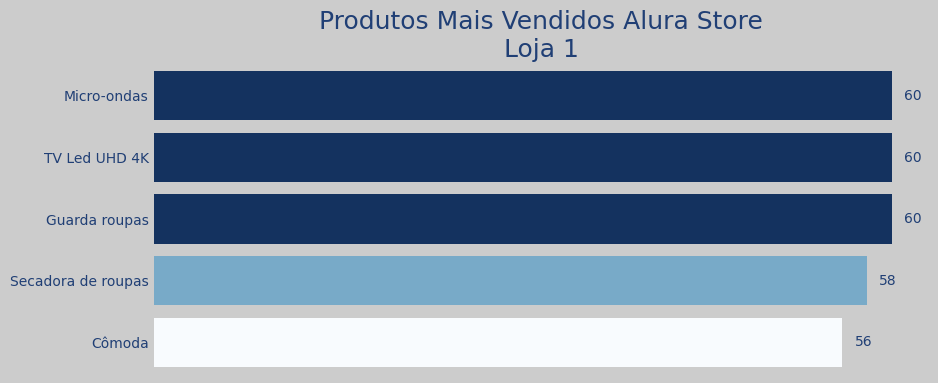

In [272]:
fig, ax = plt.subplots(figsize=(10, 4), facecolor='#cccccc')
ax.set_facecolor('#cccccc')
ax = sns.barplot(data=mais_vendidos_loja_1, y=mais_vendidos_loja_1['Produto'], x='Quantidade', orient= 'h', hue='Quantidade', palette='Blues', legend=False)

for i, v in enumerate(mais_vendidos_loja_1['Quantidade']):
  ax.text(v + 1, i, str(v), color='#203f75', fontsize=10, ha= 'left', va='center')

ax.set_title('Produtos Mais Vendidos Alura Store\nLoja 1', loc='center', fontsize=18, color='#203f75')
ax.set_xlabel('')
ax.set_ylabel('')


ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', which='both', length= 0, colors='#203f75')
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.show()

In [217]:
mais_vendidos_loja_2 = prod_mais_vendidos(loja_2)

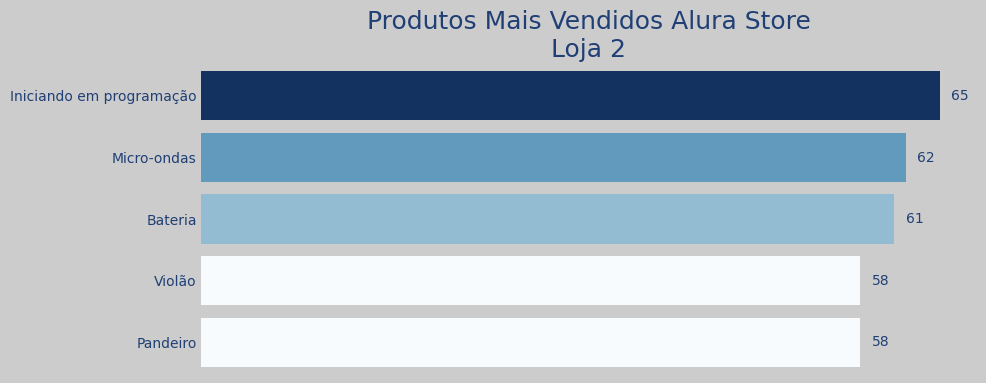

In [273]:
fig, ax = plt.subplots(figsize=(10, 4), facecolor='#cccccc')
ax.set_facecolor('#cccccc')
ax = sns.barplot(data=mais_vendidos_loja_2, y=mais_vendidos_loja_2['Produto'], x='Quantidade', orient= 'h', hue='Quantidade', palette='Blues', legend=False)

for i, v in enumerate(mais_vendidos_loja_2['Quantidade']):
  ax.text(v + 1, i, str(v), color='#203f75', fontsize=10, ha= 'left', va='center')

ax.set_title('Produtos Mais Vendidos Alura Store\nLoja 2', loc='center', fontsize=18, color='#203f75')
ax.set_xlabel('')
ax.set_ylabel('')


ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', which='both', length= 0, colors='#203f75')
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.show()

In [219]:
mais_vendidos_loja_3 = prod_mais_vendidos(loja_3)

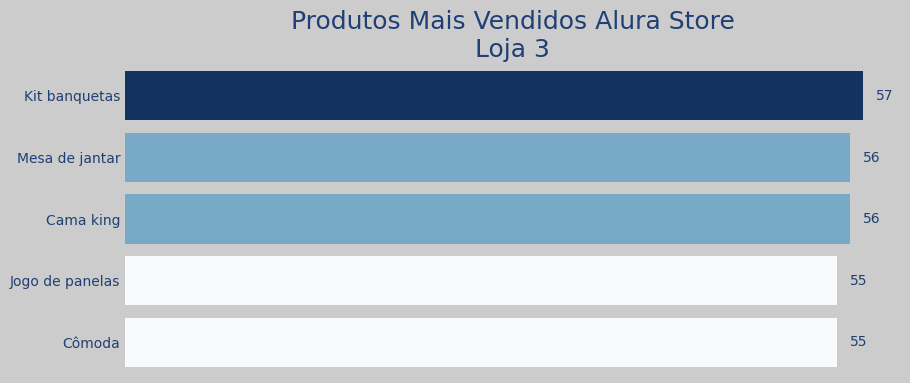

In [274]:
fig, ax = plt.subplots(figsize=(10, 4), facecolor='#cccccc')
ax.set_facecolor('#cccccc')
ax = sns.barplot(data=mais_vendidos_loja_3, y=mais_vendidos_loja_3['Produto'], x='Quantidade', orient= 'h', hue='Quantidade', palette='Blues', legend=False)

for i, v in enumerate(mais_vendidos_loja_3['Quantidade']):
  ax.text(v + 1, i, str(v), color='#203f75', fontsize=10, ha= 'left', va='center')

ax.set_title('Produtos Mais Vendidos Alura Store\nLoja 3', loc='center', fontsize=18, color='#203f75')
ax.set_xlabel('')
ax.set_ylabel('')


ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', which='both', length= 0, colors='#203f75')
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.show()

In [221]:
mais_vendidos_loja_4 = prod_mais_vendidos(loja_4)

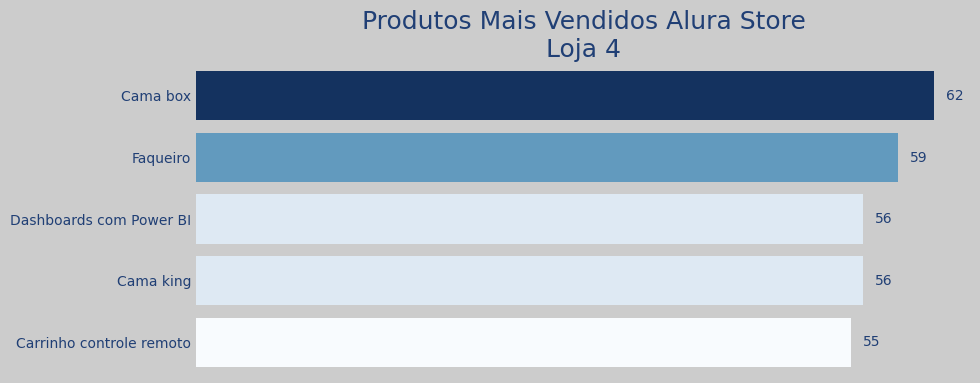

In [275]:
fig, ax = plt.subplots(figsize=(10, 4), facecolor='#cccccc')
ax.set_facecolor('#cccccc')
ax = sns.barplot(data=mais_vendidos_loja_4, y=mais_vendidos_loja_4['Produto'], x='Quantidade', orient= 'h', hue='Quantidade', palette='Blues', legend=False)

for i, v in enumerate(mais_vendidos_loja_4['Quantidade']):
  ax.text(v + 1, i, str(v), color='#203f75', fontsize=10, ha= 'left', va='center')

ax.set_title('Produtos Mais Vendidos Alura Store\nLoja 4', loc='center', fontsize=18, color='#203f75')
ax.set_xlabel('')
ax.set_ylabel('')


ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', which='both', length= 0, colors='#203f75')
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.show()

### 4.2 - Menos vendidos

In [60]:
# Criando o DataFrame formatado para os MENOS vendidos
df_menos_vendidos = df_produtos.apply(
    lambda s: [f"{prod}: {val}" for prod, val in s.nsmallest(3).items()],
    axis=1,
    result_type='expand'
)

# Renomeando as colunas para refletir o "ranking inverso"
df_menos_vendidos.columns = ['Último Lugar', 'Penúltimo Lugar', 'Antepenúltimo Lugar']

df_menos_vendidos


,Último Lugar,Penúltimo Lugar,Antepenúltimo Lugar
Loja,,,
Loja 1,Celular ABXY: 33,Headset: 33,Panela de pressão: 35
Loja 2,Jogo de tabuleiro: 32,Impressora: 34,Mesa de jantar: 34
Loja 3,Blocos de montar: 35,Jogo de copos: 36,Micro-ondas: 36
Loja 4,Guitarra: 33,Guarda roupas: 34,Violão: 37


In [223]:
menos_vendidos_loja_1 = prod_menos_vendidos(loja_1)

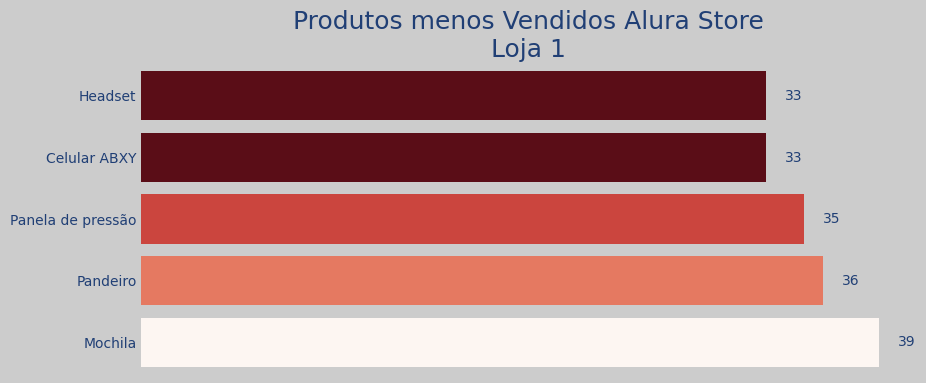

In [277]:
fig, ax = plt.subplots(figsize=(10, 4), facecolor='#cccccc')
ax.set_facecolor('#cccccc')
ax = sns.barplot(data=menos_vendidos_loja_1, y=menos_vendidos_loja_1['Produto'], x='Quantidade', orient= 'h', hue='Quantidade', palette='Reds_r', legend=False)

for i, v in enumerate(menos_vendidos_loja_1['Quantidade']):
  ax.text(v + 1, i, str(v), color='#203f75', fontsize=10, ha= 'left', va='center')

ax.set_title('Produtos menos Vendidos Alura Store\nLoja 1', loc='center', fontsize=18, color='#203f75')
ax.set_xlabel('')
ax.set_ylabel('')


ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', which='both', length= 0, colors='#203f75')
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.show()

In [224]:
menos_vendidos_loja_2 = prod_menos_vendidos(loja_2)

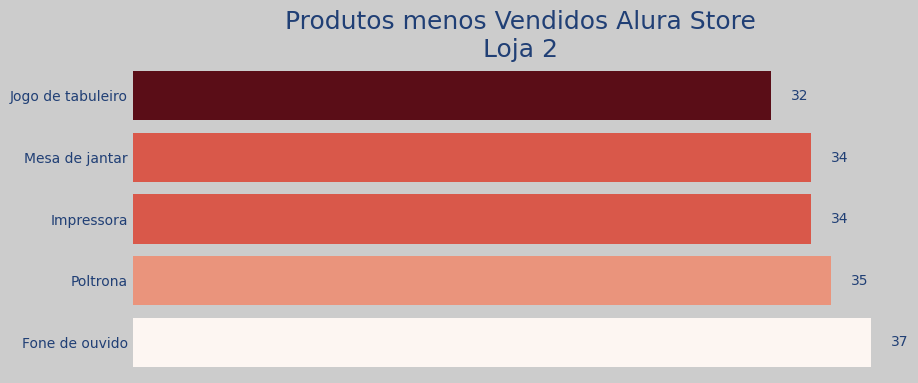

In [278]:
fig, ax = plt.subplots(figsize=(10, 4), facecolor='#cccccc')
ax.set_facecolor('#cccccc')
ax = sns.barplot(data=menos_vendidos_loja_2, y=menos_vendidos_loja_2['Produto'], x='Quantidade', orient= 'h', hue='Quantidade', palette='Reds_r', legend=False)

for i, v in enumerate(menos_vendidos_loja_2['Quantidade']):
  ax.text(v + 1, i, str(v), color='#203f75', fontsize=10, ha= 'left', va='center')

ax.set_title('Produtos menos Vendidos Alura Store\nLoja 2', loc='center', fontsize=18, color='#203f75')
ax.set_xlabel('')
ax.set_ylabel('')


ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', which='both', length= 0, colors='#203f75')
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.show()

In [225]:
menos_vendidos_loja_3 = prod_menos_vendidos(loja_3)

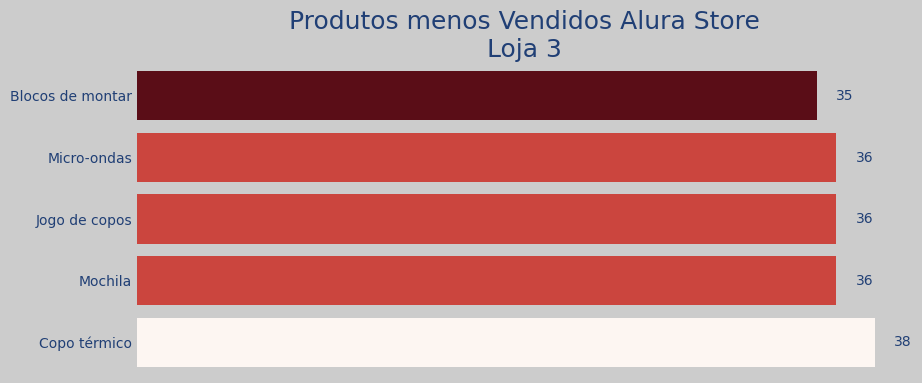

In [279]:
fig, ax = plt.subplots(figsize=(10, 4), facecolor='#cccccc')
ax.set_facecolor('#cccccc')
ax = sns.barplot(data=menos_vendidos_loja_3, y=menos_vendidos_loja_3['Produto'], x='Quantidade', orient= 'h', hue='Quantidade', palette='Reds_r', legend=False)

for i, v in enumerate(menos_vendidos_loja_3['Quantidade']):
  ax.text(v + 1, i, str(v), color='#203f75', fontsize=10, ha= 'left', va='center')

ax.set_title('Produtos menos Vendidos Alura Store\nLoja 3', loc='center', fontsize=18, color='#203f75')
ax.set_xlabel('')
ax.set_ylabel('')


ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', which='both', length= 0, colors='#203f75')
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.show()

In [226]:
menos_vendidos_loja_4 = prod_menos_vendidos(loja_4)

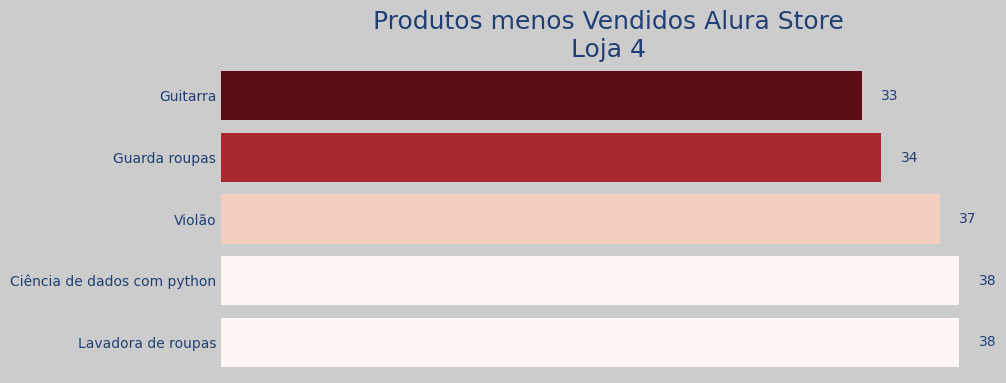

In [280]:
fig, ax = plt.subplots(figsize=(10, 4), facecolor='#cccccc')
ax.set_facecolor('#cccccc')
ax = sns.barplot(data=menos_vendidos_loja_4, y=menos_vendidos_loja_4['Produto'], x='Quantidade', orient= 'h', hue='Quantidade', palette='Reds_r', legend=False)

for i, v in enumerate(menos_vendidos_loja_4['Quantidade']):
  ax.text(v + 1, i, str(v), color='#203f75', fontsize=10, ha= 'left', va='center')

ax.set_title('Produtos menos Vendidos Alura Store\nLoja 4', loc='center', fontsize=18, color='#203f75')
ax.set_xlabel('')
ax.set_ylabel('')


ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', which='both', length= 0, colors='#203f75')
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.show()

## 5. Frete médio por loja

In [284]:
frete_medio = pd.DataFrame(columns=['Loja', 'Frete Médio'])

In [286]:
media_frete(loja_1, 1)
media_frete(loja_2, 2)
media_frete(loja_3, 3)
media_frete(loja_4, 4)

(np.float64(31.28),
      Loja Frete Médio
 0  Loja 1       34.69
 1  Loja 2       33.62
 2  Loja 3       33.07
 3  Loja 4       31.28)

In [287]:
frete_medio

,Loja,Frete Médio
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


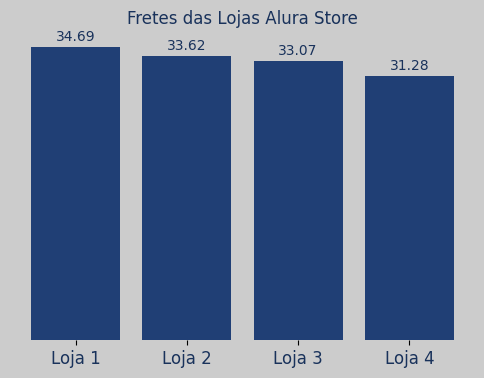

In [298]:
fig = plt.figure(figsize=(6, 4), facecolor='#cccccc')
ax = plt.axes()
ax.set_facecolor('#cccccc')
bars = plt.bar(frete_medio['Loja'], frete_medio['Frete Médio'], color='#203f75')

for bar in bars:
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = bar.get_height() + (frete_medio['Frete Médio'].max() * 0.01)
    value_text = f'{bar.get_height():,.2f}'
    plt.text(x_pos, y_pos, value_text, ha='center', va='bottom', color='#19325b', fontsize=10)

plt.title('Fretes das Lojas Alura Store', color='#19325b', fontsize= 12)
plt.xlabel('')
plt.xticks(fontsize= 12, color='#19325b')

ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)

plt.show()